In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data['Survived'].replace({0:'Not Survived', 1:'Survived'}, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not Survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
x = pd.crosstab(data['Pclass'], data['Survived'], margins=True)
x

Survived,Not Survived,Survived,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [10]:
y = pd.crosstab(data['Sex'],data['Survived'], margins = True)
y

Survived,Not Survived,Survived,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<Axes: title={'center': 'Survived Analysis Per Class'}, xlabel='Pclass'>

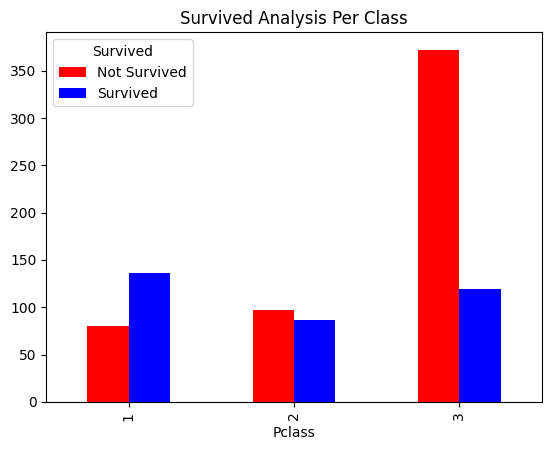

In [11]:
x.iloc[:-1,:-1].plot(kind='bar', stacked = False,color=['red','blue'],grid=False,title='Survived Analysis Per Class')

<Axes: xlabel='Sex'>

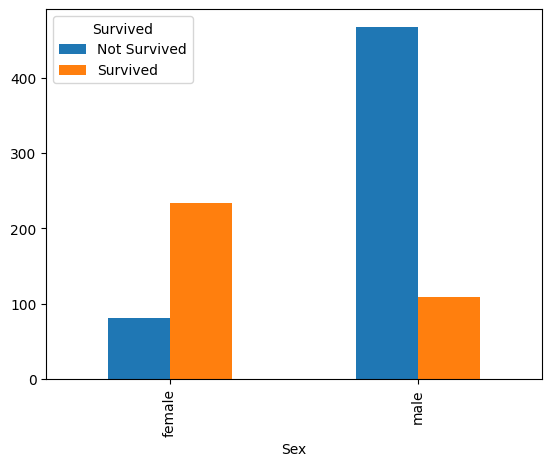

In [12]:
y.iloc[:-1,:-1].plot(kind = 'bar')

Text(0, 0.5, 'Fare')

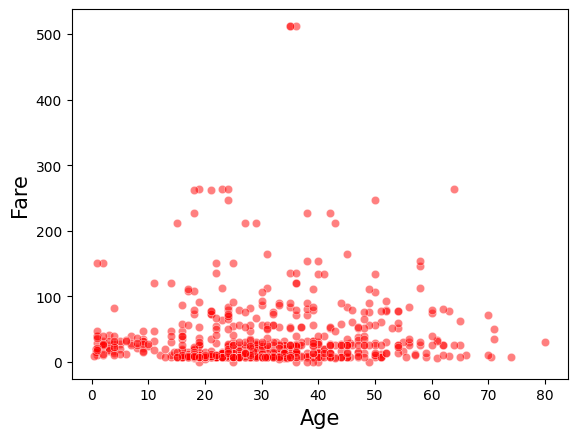

In [13]:
sns.scatterplot(x=data['Age'], y=data['Fare'], alpha=0.5, color=['red'])
plt.xlabel('Age', fontsize=15)
plt.ylabel('Fare', fontsize=15)

<Axes: title={'center': 'Age'}, xlabel='Survived'>

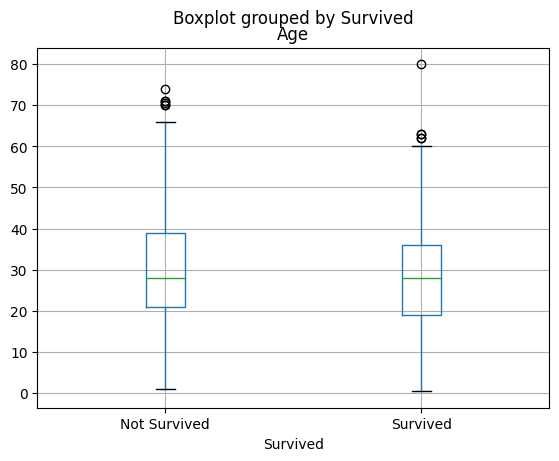

In [14]:
data.boxplot(column='Age', by='Survived')

<Axes: title={'center': 'Age'}, xlabel='[Sex]'>

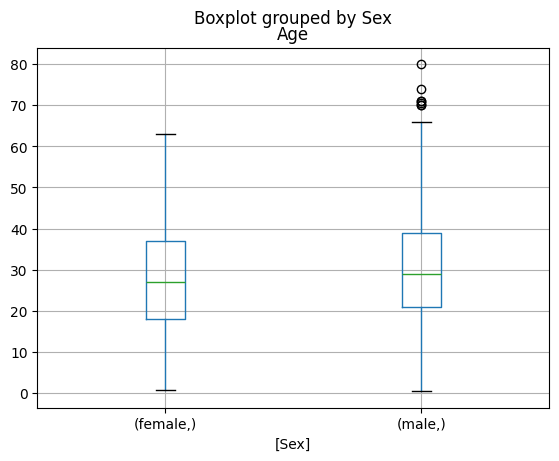

In [15]:
data.boxplot(column=['Age'], by=['Sex'])

<Axes: title={'center': 'Fare'}, xlabel='[Survived]'>

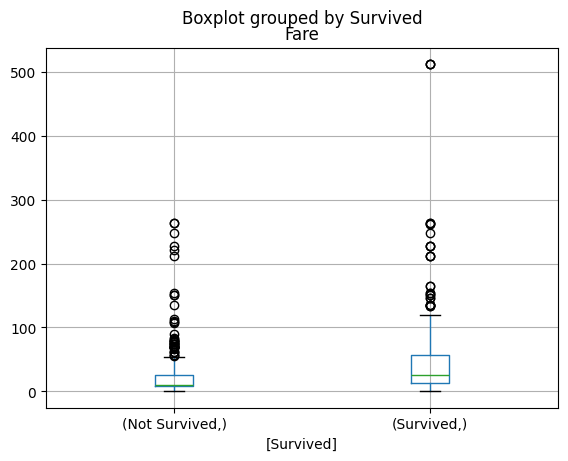

In [16]:
data.boxplot(column=['Fare'], by=['Survived'])

In [17]:
fare_filter_data = data[data['Fare']<=300]

In [18]:
fare_filter_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not Survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: title={'center': 'Fare'}, xlabel='Survived'>

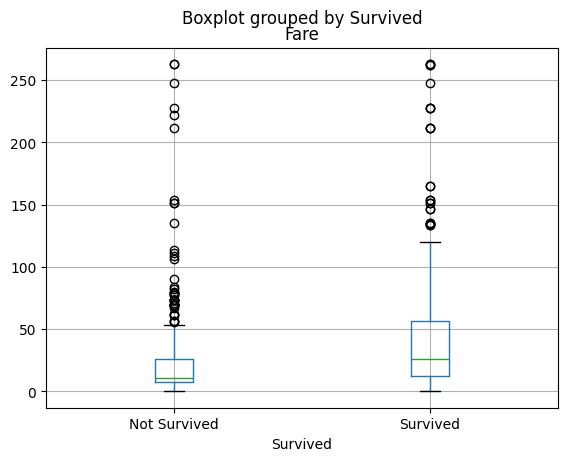

In [19]:
fare_filter_data.boxplot(column=['Fare'], by='Survived')

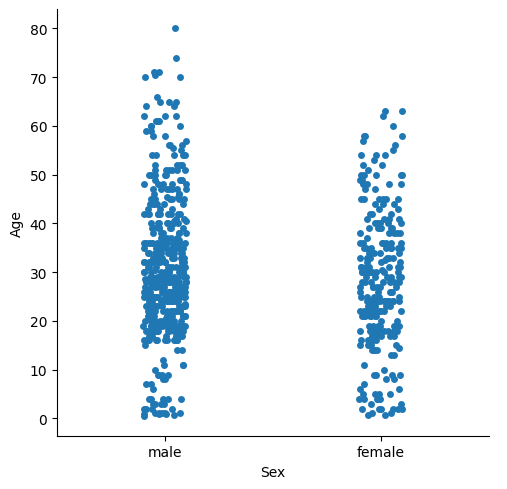

In [20]:
sns.catplot(x=data['Sex'],y=data['Age'])

<Axes: xlabel='Age', ylabel='Density'>

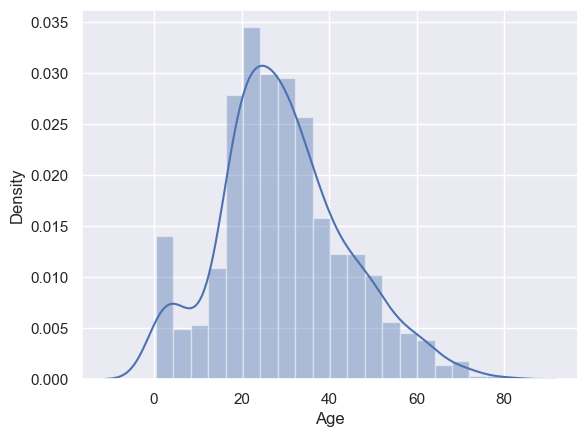

In [21]:
sns.set(color_codes = True)
sns.distplot(data['Age'].dropna())

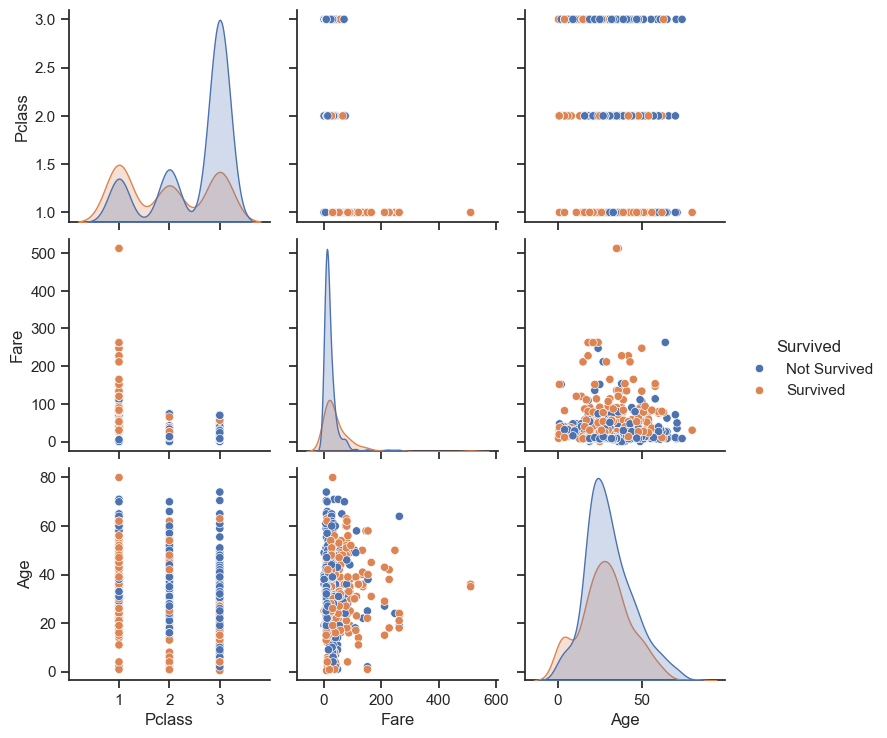

In [22]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data, vars=['Pclass','Fare','Age'], hue='Survived')

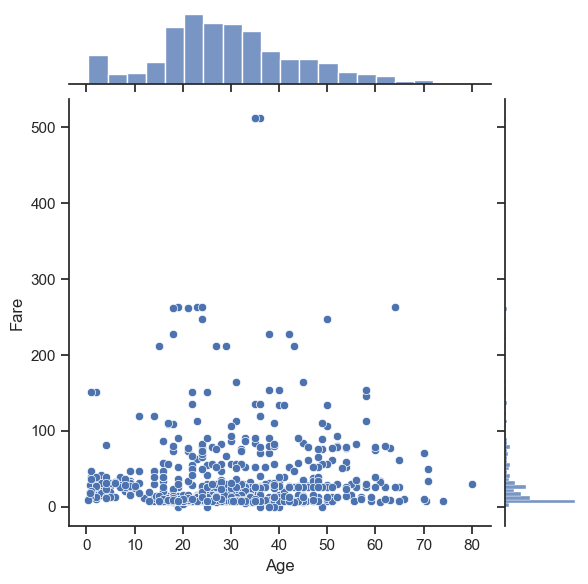

In [23]:
sns.jointplot(data=data, x="Age", y="Fare", kind="scatter")

<Axes: xlabel='Age', ylabel='Fare'>

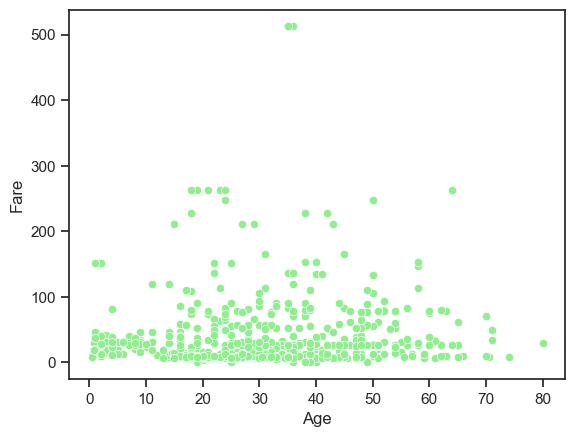

In [24]:
sns.scatterplot(x=data['Age'], y=data['Fare'],color='lightgreen')

<Axes: xlabel='Pclass', ylabel='Age'>

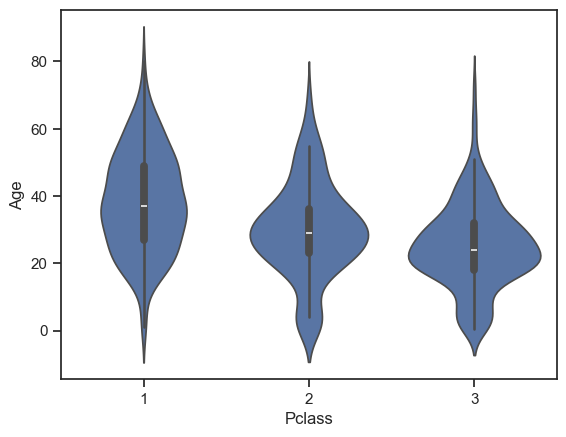

In [25]:
sns.violinplot(x=data['Pclass'], y=data['Age'])